In [1]:
import sys
sys.path.insert(1, '../src')
from util import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandarallel import pandarallel
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import NMF
import nltk
import warnings
from sklearn.decomposition import TruncatedSVD
from collections import defaultdict


In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", None)
pd.set_option("precision", 3)
%pylab inline
%config InlineBackend.figure_formats = ['retina']
pandarallel.initialize()

Populating the interactive namespace from numpy and matplotlib
INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


## **1. Read clcean data**

In [3]:
fn = '../data/data_preprocessed.pickle'
data = read_from_pickle(fn)
df = data['df_original']
data.keys()

Read data from "../data/data_preprocessed.pickle"


dict_keys(['df_words_tkn', 'dict_ngrams', 'df_original'])

## **2. Here are some of my papers**

In [4]:
# my paper! proud of these!!!
df[(df['first_author']=='Wei Zhao') & (df['last_author']=='Songbai Ji')]

,title,journal,keywords,abstract,first_author,last_author,year,title_and_abstract,title_and_abstract_lemma
4238,Displacement Strain Discrimination Head Injury...,Annals of biomedical engineering,"Anisotropy"", ""Concussion"", ""Head impact"", ""Mod...",Successful validation head injury model critic...,Wei Zhao,Songbai Ji,2020,Displacement Strain Discrimination Head Injury...,displacement strain discrimination head injury...
4503,Incorporation vasculature head injury model lo...,Journal of biomechanics,"Finite element model"", ""Neuroimaging"", ""Trauma...",Cerebral vasculature several orders magnitude ...,Wei Zhao,Songbai Ji,2020,Incorporation vasculature head injury model lo...,incorporation vasculature head injury model lo...
10701,Mesh Convergence Behavior Effect Element Integ...,Annals of biomedical engineering,"Element integration"", ""Finite element model"", ...",Numerous head injury models vary mesh density ...,Wei Zhao,Songbai Ji,2018,Mesh Convergence Behavior Effect Element Integ...,mesh convergence behavior effect element integ...
13049,White Matter Anisotropy Impact Simulation Resp...,Journal of neurotrauma,"Worcester Head Injury Model"", ""concussion"", ""t...",Advanced new opportunities head injury models ...,Wei Zhao,Songbai Ji,2018,White Matter Anisotropy Impact Simulation Resp...,white matter anisotropy impact simulation resp...
13851,Material properties brain injury relevant cond...,Journal of the mechanical behavior of biomedic...,"Concussion"", ""Head injury model"", ""Hyperelasti...",Material properties brain vast variations cons...,Wei Zhao,Songbai Ji,2018,Material properties brain injury relevant cond...,material property brain injury relevant condit...
16405,Performance Evaluation Pre Brain Response Atla...,Annals of biomedical engineering,"Concussion"", ""Contact sports"", ""Finite element...",pre brain response atlas pcBRA potential inves...,Wei Zhao,Songbai Ji,2017,Performance Evaluation Pre Brain Response Atla...,performance evaluation pre brain response atla...
17132,Injury prediction vulnerability assessment str...,Biomechanics and modeling in mechanobiology,"Concussion"", ""Deep white matter"", ""Fiber strai...",Reliable prediction diagnosis concussion impor...,Wei Zhao,Songbai Ji,2017,Injury prediction vulnerability assessment str...,injury prediction vulnerability assessment str...
19544,White Matter Injury Susceptibility Fiber Strai...,Journal of neurotrauma,"Dartmouth Head Injury Model"", ""fiber strain"", ...",Microscale brain injury studies axonal elongat...,Wei Zhao,Songbai Ji,2016,White Matter Injury Susceptibility Fiber Strai...,white matter injury susceptibility fiber strai...
19908,Brain strain uncertainty due variation simplif...,Biomechanics and modeling in mechanobiology,"Brain strains"", ""Head angular motion"", ""Head i...",Head angular velocity acceleration predictive ...,Wei Zhao,Songbai Ji,2016,Brain strain uncertainty due variation simplif...,brain strain uncertainty due variation simplif...
22342,Real time whole brain pressure responses trans...,Interface focus,"Dartmouth head injury model"", ""Head Injury Cri...",Theoretical debate role linear acceleration li...,Wei Zhao,Songbai Ji,2016,Real time whole brain pressure responses trans...,real time whole brain pressure response transl...


## **3. Yearly counts of publications**

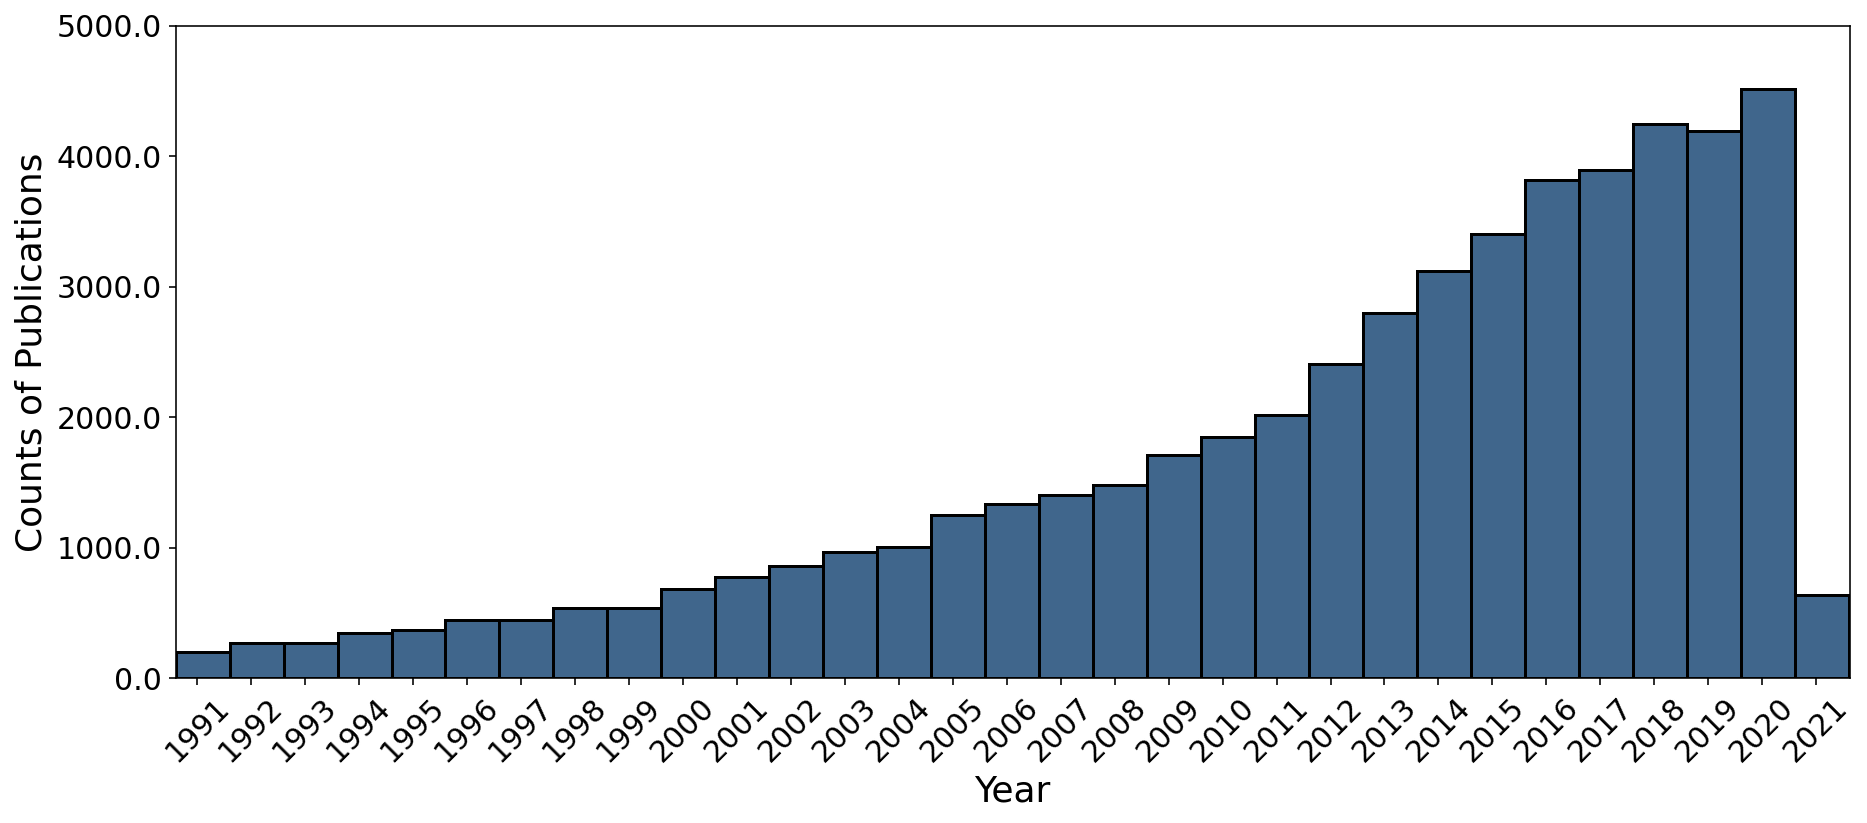

In [5]:
year = range(1991, 2022)
d = defaultdict(list)
c = defaultdict(list)

for y in year:
    c[y] = sum([df['year'] == y])

c = pd.Series(c, index=c.keys())
plt.subplots(figsize=(15, 6))
# ax = plt.bar(c.index, c, )

ax = sns.barplot(x=c.index, y=c,
                 color=(0.2, 0.4, 0.6),
                 edgecolor=(0,0,0),
                 linewidth=1.5)
ax.set_xticklabels(c.index,
                   rotation=45,
                   ha='center',
                   fontsize=15,
                  )
ax.set_yticklabels(ax.get_yticks(),
                   fontsize=15,
                  )
ax.set_xlabel('Year', fontsize=18,)
ax.set_ylabel('Counts of Publications', fontsize=18,)
[t_ax.set_width(1) for t_ax in ax.patches];
ax.set_xlim([-0.4,30.62])
ax.set_ylim([0, 5000]);
fn = '../figures/counts_of_publications.svg'
plt.savefig(fn, dpi=300, bbox_inches='tight', facecolor="white")

## **4. Top 10 most popular journals identified based on cumulative counts of publications**

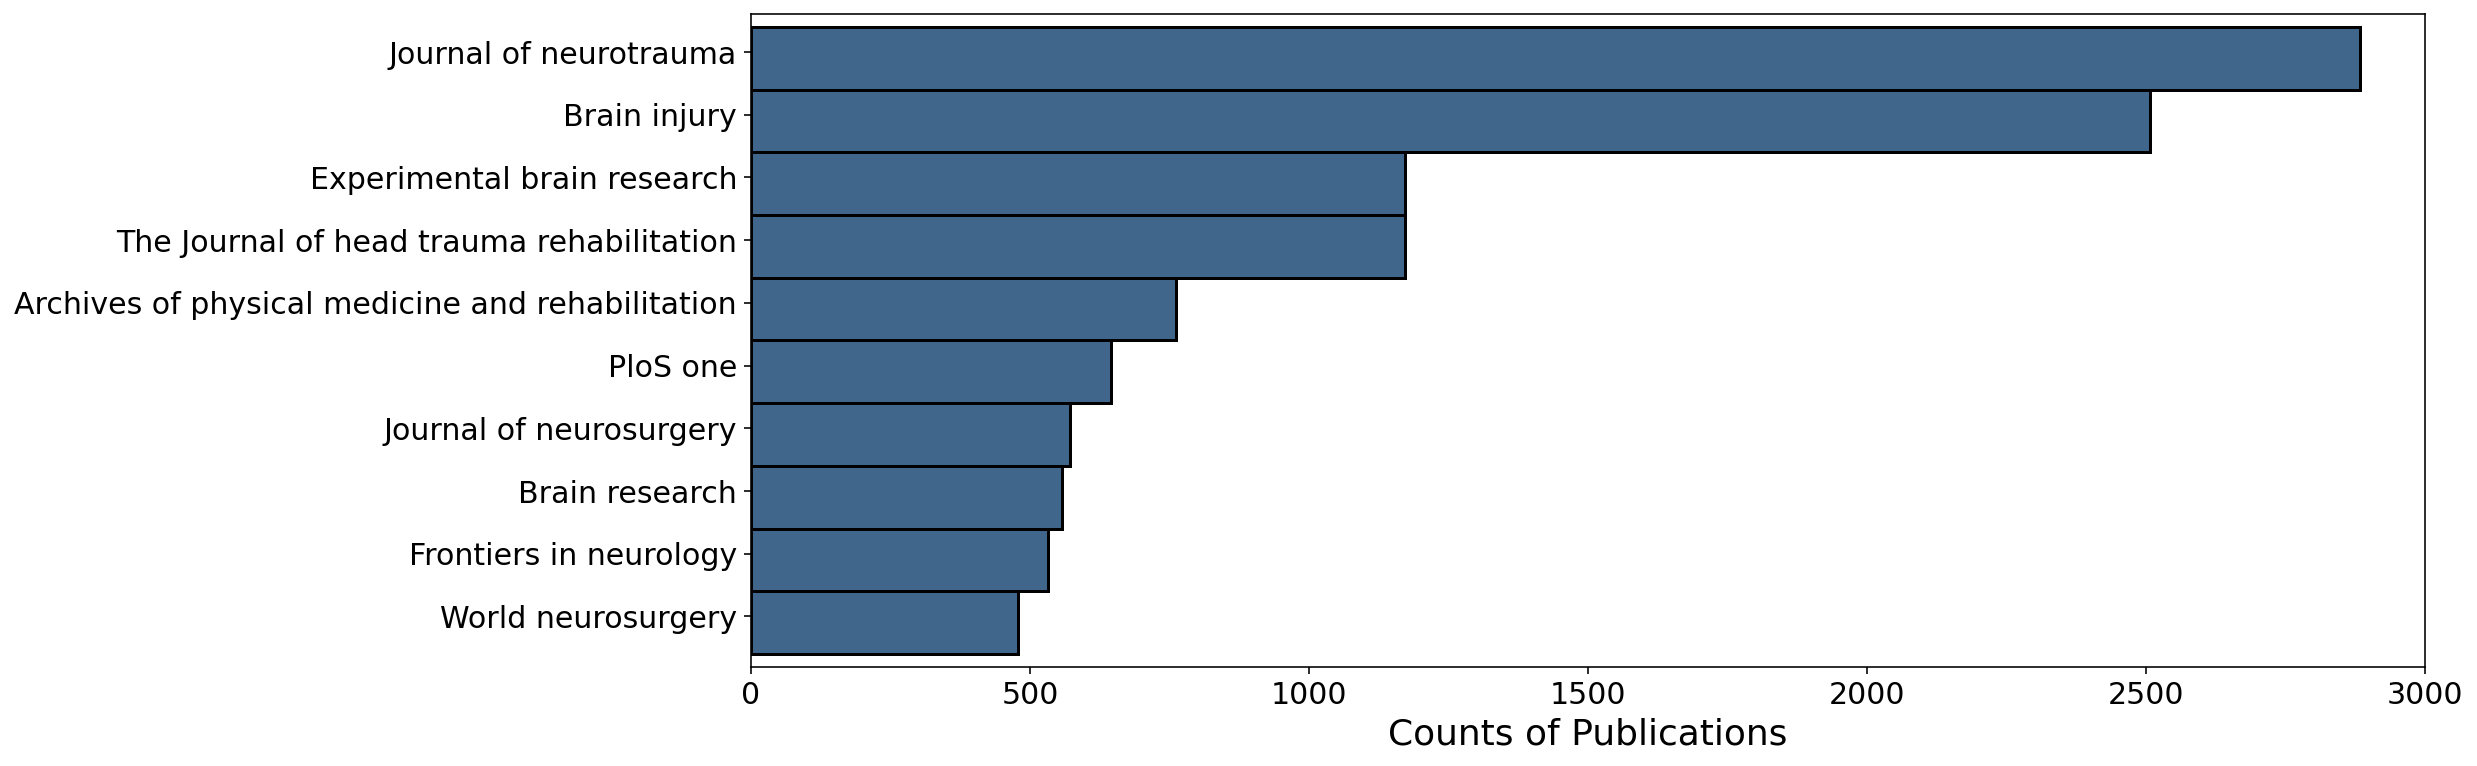

In [6]:
c = df['journal'].value_counts().head(10)
plt.subplots(figsize=(15, 6))
# ax = plt.bar(c.index, c, )

ax = sns.barplot(y=c.index, x=c,
                 color=(0.2, 0.4, 0.6),
                 edgecolor=(0,0,0),
                 linewidth=1.5)
ax.set_xticklabels(range(0, 3100, 500),                   
                   ha='center',
                   fontsize=15,
                  )
ax.set_yticklabels(c.index,
                   fontsize=15,
                  )
ax.set_xlim([0, 3000])
ax.set_ylim([9.8, -0.6])
ax.set_xlabel('Counts of Publications', fontsize=18,)
[t_ax.set_height(1) for t_ax in ax.patches];
fn = '../figures/top_10_most_pop_journals_over_30_years.svg'
plt.savefig(fn, dpi=300, bbox_inches='tight', facecolor="white")

## 5. Yearly most popular journal based on the counts of publications in that year

In [7]:
df_coutns_num = pd.DataFrame()
df_coutns_title = pd.DataFrame()

df_coutns_num = (df[['year', 'journal']]
     .groupby(['year'], as_index=False)
     .apply(lambda x: x['journal'].value_counts().iloc[0]))
df_coutns_title = (df[['year', 'journal']]
     .groupby(['year'], as_index=False)
     .apply(lambda x: x['journal'].value_counts().index[0]))
df_counts = df_coutns_num.merge(df_coutns_title,how='left', on='year')
df_counts.columns = ['year', 'Counts of Publications', 'Most Pop.Journal']
df_counts

,year,Counts of Publications,Most Pop.Journal
0,1991,15,Brain injury
1,1992,29,Brain injury
2,1993,32,Brain injury
3,1994,37,Brain injury
4,1995,42,Brain injury
5,1996,47,Brain injury
6,1997,45,Brain injury
7,1998,56,Brain injury
8,1999,42,Journal of neurotrauma
9,2000,66,Brain injury
